# MNIST Hyperparameter Optimization Demo

The MNIST database of handwritten digits, available publicly, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to experiment on learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. For these reasons, MNIST is a very popular baseline dataset for AI researchers exploring effectiveness of their Neural Network architectures, hyperparameter tuning or optimization techniques.


In this tutorial we will show how to perform Hyperparameter Optimization on MNIST using LeNet (http://yann.lecun.com/exdb/lenet/), a basic and popular neural network.  
We modify a public implementation (https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py
), to find the best hyperparameter configuration for LeNet. We also demonstrate how to effectively switch between various HPO proposers such as Spearmint and Hyperband.

# Running the Experiments 

We use the ‘mnist_hpo_demo.py’ file to accept hyperparameters from Auptimizer and run an Experiment. Since the values of the hyperparameters can widely swing the performance of the classification algorithm, finding an optimal configuration is very important. We define the range of hyperparameters for Auptimizer to consider in ‘exp_hpo_demo.json’. We choose the following hyperparameter ranges to optimize –

1) Learning Rate: [ 0.001, 0.01 ]

2) Dropout Probability: [ 0.0, 0.5 ]

3) 1st layer Convolution filters: [ 20, 50 ]

4) 2nd Layer Convolution filters: [ 40, 80 ]

5) Fully Connected layer size: [ 700, 2000 ]


While we iterate over different Proposer algorithms.


Each instance of 'mnist_hpo_demo.py' would accept an experiment configuration of hyperparameters, train the defined neural network, evaluate the network, and return the final performance statistics. The ‘exp_hpo_demo.json’ file contains code to perform HPO using AWS resources and consider 100 samples for each proposer. We can easily switch between proposers and see how they choose different configurations to optimize the final performance.

To run the experiment use command- 

'python3 -m aup exp_hpo_demo.json' 



# Analysis 

We next analyze the experiment results using the sqlite database for our experiments. The details for the experiment can be found inn the jobs profile, but here we aim to compare the proposers. Experiment 1 is performed using Grid Search, and Random, Spearmint, Hyperband, Hyperopt Proposers for Experiments 2,3,4 and 5 respectively.

In [26]:
'''
Connect to the Auptimizer database
''' 

import sqlite3
import time
import datetime
import random

conn = sqlite3.connect('sqlite3.db')
c = conn.cursor()


In [10]:
'''
Function to compile and return details from a Auptimizer experiment. 
Takes experiment id as input, returns score, jobs ran for the experiments, and end time for each job.
''' 

def graph_data(ex):
    c.execute('SELECT score, jid, end_time FROM job WHERE eid = '+ str(ex))
    data = c.fetchall()

    jobs = []
    score = []
    times =[]
    
    for row in data:
        times.append(row[2])
        jobs.append(row[1])
        score.append(row[0])

    times = [a-min(times) for a in times] 
    jobs = [a-min(jobs) for a in jobs]
    
    print(score)
    print(jobs)
    
    return (score, times, jobs)
    

In [15]:
'''
Compile results for grid search, random, spearmint, hyperband, hyperopt Proposers
''' 

s_gri, t_gri, j_gri = graph_data(1)
s_ran, t_ran, j_ran = graph_data(2)
s_spe, t_spe, j_spe = graph_data(3)
s_hpb, t_hpb, j_hpb = graph_data(4)
s_opt, t_opt, j_opt = graph_data(5)

[0.9895, 0.9893, 0.9677, 0.9602, 0.9852, 0.9886, 0.9685, 0.9698, 0.9899, 0.9908, 0.9738, 0.9701, 0.9911, 0.9899, 0.9699, 0.9699, 0.9875, 0.9907, 0.9672, 0.9697, 0.9892, 0.9901, 0.9597, 0.9636, 0.9898, 0.9914, 0.9755, 0.9628, 0.9914, 0.9892, 0.9693, 0.9737, 0.9904, 0.992, 0.9691, 0.9591, 0.9898, 0.9873, 0.9662, 0.9525, 0.9815, 0.9892, 0.9613, 0.951, 0.9905, 0.9892, 0.9722, 0.9591, 0.9876, 0.9922, 0.9446, 0.9528, 0.9883, 0.9898, 0.9641, 0.9619, 0.9905, 0.9893, 0.9697, 0.9629, 0.9891, 0.9908, 0.976, 0.954, 0.9911, 0.9892, 0.9598, 0.9606, 0.9878, 0.9883, 0.9621, 0.9584, 0.9871, 0.9901, 0.9663, 0.956, 0.9896, 0.9869, 0.9628, 0.9437, 0.9908, 0.9885, 0.9543, 0.9586, 0.9874, 0.9905, 0.9665, 0.9712, 0.9912, 0.9902, 0.9665, 0.9494, 0.9897, 0.9903, 0.9603, 0.9562, 0.9853, 0.9894, 0.9614, 0.9498, 0.9889, 0.9907, 0.9595, 0.9494, 0.9899, 0.9891, 0.9627, 0.9544]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 3

# Visualization

We can easily visualize the performance of the hyperparameter optimization algorithms for our current experiment and how configurations can affect the final performance. In the plots below we compare job performance and time with accuracy achieved. 

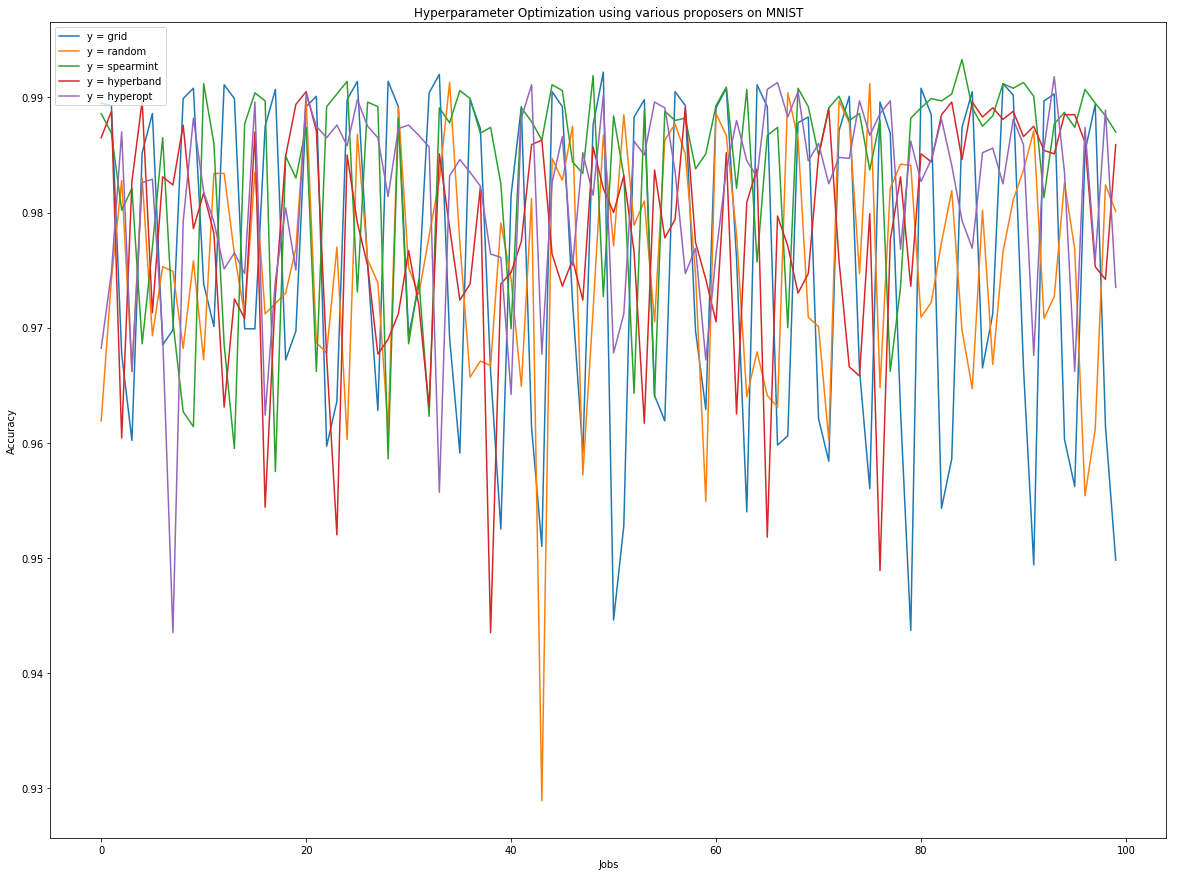

In [23]:
'''
Plots for the experiment results
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))


plt.plot(j_gri[:100], s_gri[:100])
plt.plot(j_ran, s_ran)
plt.plot(j_spe, s_spe)
plt.plot(j_hpb[:100], s_hpb[:100])
plt.plot(j_opt, s_opt)

plt.legend(['y = grid','y = random', 'y = spearmint', 'y = hyperband', 'y = hyperopt'], loc='upper left')

plt.title('Hyperparameter Optimization using various proposers on MNIST')
plt.xlabel('Jobs')
plt.ylabel('Accuracy')


plt.show()

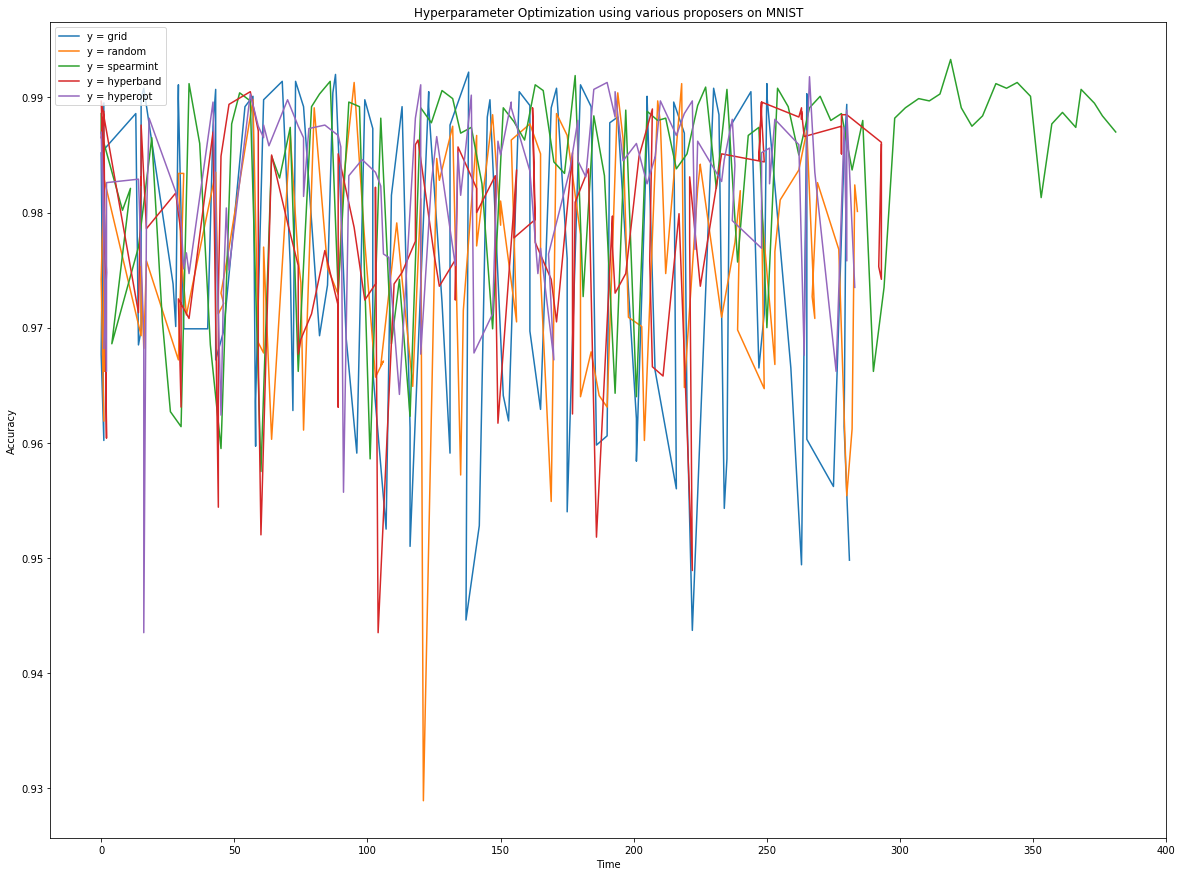

In [24]:
'''
Plots for the experiment results
'''


import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))


plt.plot(t_gri[:100], s_gri[:100])
plt.plot(t_ran, s_ran)
plt.plot(t_spe, s_spe)
plt.plot(t_hpb[:100], s_hpb[:100])
plt.plot(t_opt, s_opt)

plt.legend(['y = grid','y = random', 'y = spearmint', 'y = hyperband', 'y = hyperopt'], loc='upper left')

plt.title('Hyperparameter Optimization using various proposers on MNIST')
plt.xlabel('Time')
plt.ylabel('Accuracy')

plt.show()

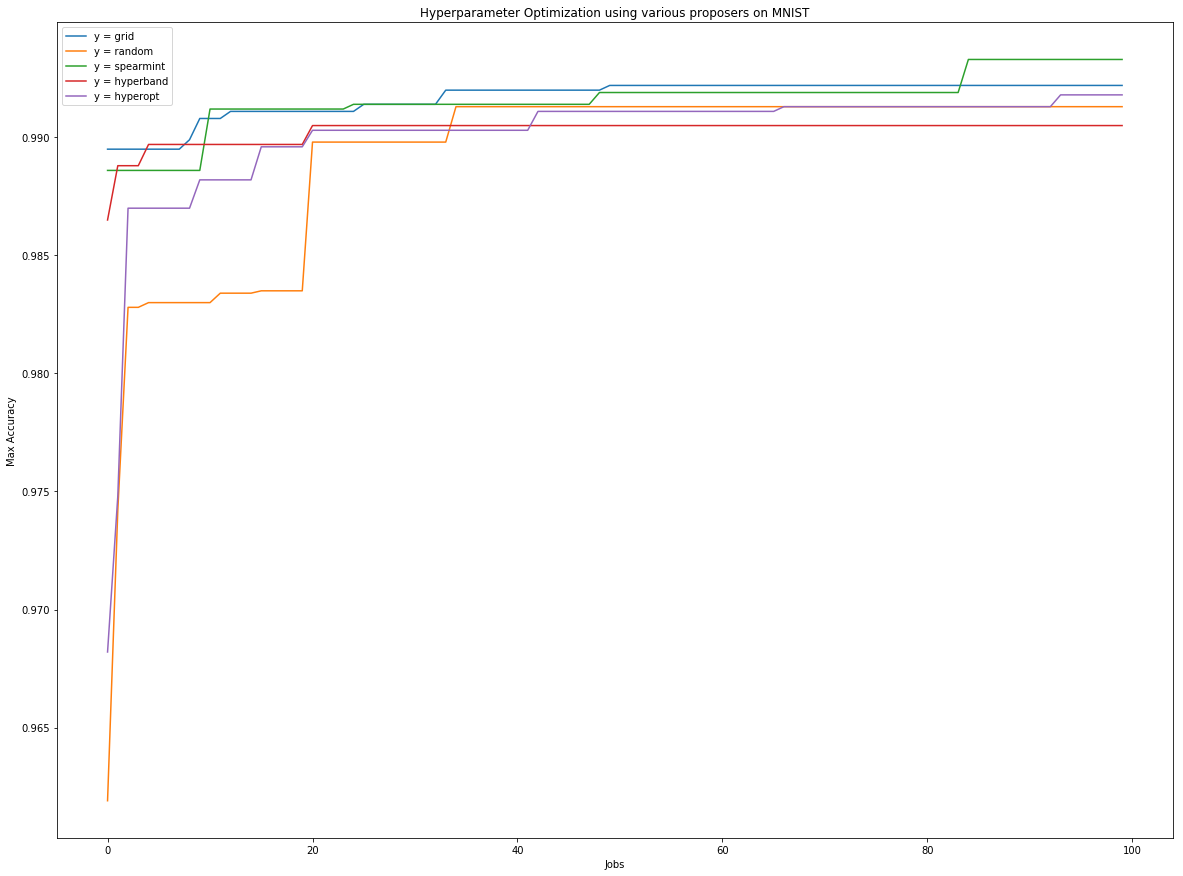

In [25]:
'''
Plots for the experiment results
'''

def max_so_far(arr):
    mmax=-1
    new_arr=[]
    for _,x in enumerate(arr):
        if x>mmax:
            mmax=x
        new_arr.append(mmax)
    return new_arr

plt.figure(figsize=(20,15))


plt.plot(j_gri[:100], max_so_far(s_gri[:100]))
plt.plot(j_ran, max_so_far(s_ran))
plt.plot(j_spe, max_so_far(s_spe))
plt.plot(j_hpb[:100], max_so_far(s_hpb[:100]))
plt.plot(j_opt, max_so_far(s_opt))

plt.legend(['y = grid','y = random', 'y = spearmint', 'y = hyperband', 'y = hyperopt'], loc='upper left')

plt.title('Hyperparameter Optimization using various proposers on MNIST')
plt.xlabel('Jobs')
plt.ylabel('Max Accuracy')

plt.show()